In [ ]:
import odp.geospatial as odp
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import warnings
warnings.filterwarnings("ignore")

## Open Vessel Emissions Dataset with ODP SDK

In [ ]:
gd = odp.GridData()

In [ ]:
ds_lowres = gd.open_dataset('Vessel Emissions 2020 LowRes')

In [ ]:
ds_lowres

,Array,Chunk
Bytes,2.91 GiB,3.88 MiB
Shape,"(12, 3970, 8192)","(1, 497, 1024)"
Count,769 Tasks,768 Chunks
Type,float64,numpy.ndarray


### Plot selection of area and time

In [ ]:
_ds_lowres = ds_lowres.sel(lon=slice(0,10),lat=slice(50,60)).isel(time=0)

In [ ]:
def plot_emissions(_ds):
    p = _ds.co2.plot.pcolormesh(
        transform=ccrs.PlateCarree(),
        cmap=plt.get_cmap('inferno'),
        vmax=_ds.co2.compute().quantile(0.97),
        subplot_kws={'projection': ccrs.Mercator()}
    )
    ax = p.axes
    ax.figure.set_size_inches(12,12)
    ax.coastlines(color='white')

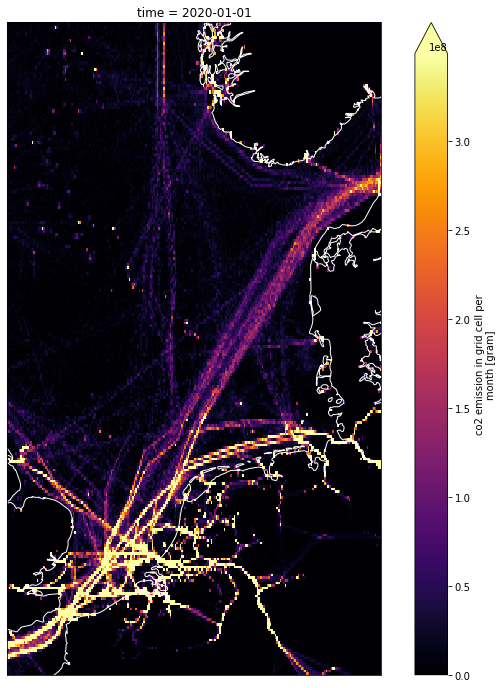

In [ ]:
plot_emissions(_ds_lowres)

### CO2 trending for a location over time

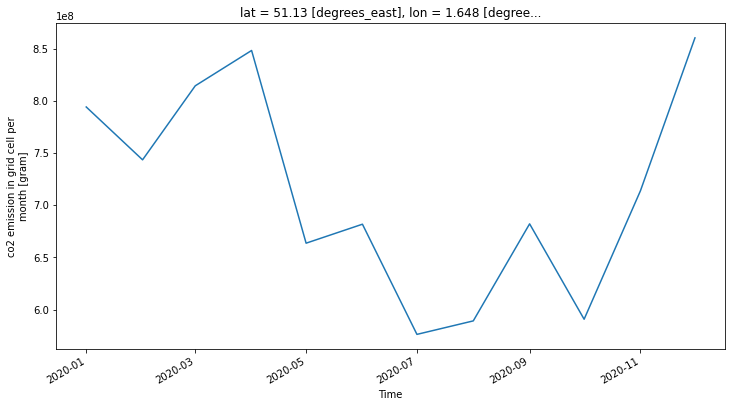

In [ ]:
ds_lowres.sel(lon=1.66197057, lat=51.11406627, method='nearest').co2.plot(figsize = (12,6))

### Comparing the high and low resolution dataset

In [ ]:
ds_highres = gd.open_dataset('Vessel Emissions 2020 HighRes')

In [ ]:
_ds_english_channel_lowres = ds_lowres.sel(lon=slice(0,3),lat=slice(50,52)).sum('time')
_ds_english_channel_highres = ds_highres.sel(lon=slice(0,3),lat=slice(50,52)).sum('time')

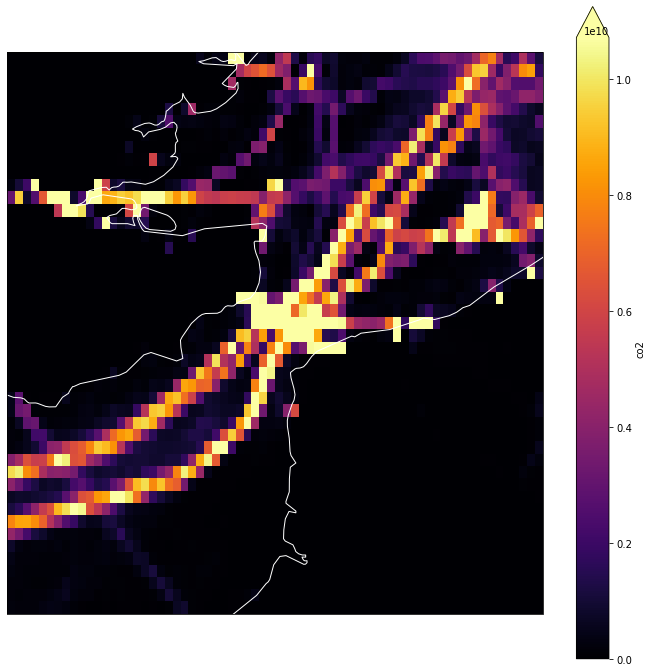

In [ ]:
plot_emissions(_ds_english_channel_lowres)

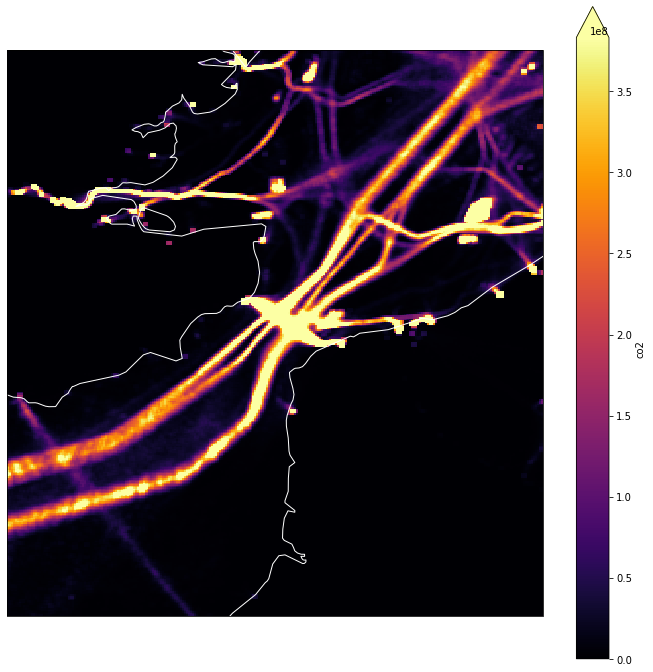

In [ ]:
plot_emissions(_ds_english_channel_highres)

### Total Emission in English Channel

In [ ]:
print('Total CO2 in English Channel area from low res dataset '
      '{:.2f} million tonnes'.format(_ds_english_channel_lowres.co2.sum().compute().values/1e12))
print('Total CO2 in English Channel area from high res dataset '
      '{:.2f} million tonnes'.format(_ds_english_channel_highres.co2.sum().compute().values/1e12))

Total CO2 in English Channel area from low res dataset 5.41 million tonnes
Total CO2 in English Channel area from high res dataset 5.44 million tonnes
